<a href="https://colab.research.google.com/github/smejiame03/ML_Supervisado/blob/master/ModeloSupervisadoT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Realice un modelo supervisado con la base de datos diabetes.csv para predecir si una persona será diabética o no. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Big Data/diabetes.csv',sep=",")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**R2/**

In [ ]:
#eliminamos las variables que no se utilizarán en el proceso
df = df.drop(['Age','Pregnancies','SkinThickness'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


In [ ]:
#--> verificar si hay nulos
df.isnull().sum() 

Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

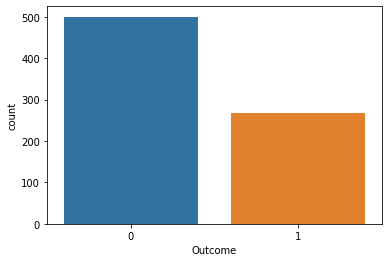

In [ ]:
#graficamos la variable objetivo Outcome
sns.countplot(df['Outcome'])

In [ ]:
#separamos x y y
X = df.loc[:, df.columns != 'Outcome']
X

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction
0,148,72,0,33.6,0.627
1,85,66,0,26.6,0.351
2,183,64,0,23.3,0.672
3,89,66,94,28.1,0.167
4,137,40,168,43.1,2.288
...,...,...,...,...,...
763,101,76,180,32.9,0.171
764,122,70,0,36.8,0.340
765,121,72,112,26.2,0.245
766,126,60,0,30.1,0.349


In [ ]:
#variable objetivo
y = df.Outcome

In [ ]:
from sklearn.tree import DecisionTreeClassifier #importamos el arbol de decision

**R3/**

In [ ]:
#separamos conjunto de entrenamiento y el conjunto de evaluación
#test size = 20 % para evaluación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

**R4/**

**Primer árbol de decisión (Modelo 1)**

In [ ]:
#instanciar objeto
#en los paréntesis van los hiperparamétros más importantes
# max_depth = numero de capas, random_state
clf = DecisionTreeClassifier(max_depth=3,random_state=52)

In [ ]:
#entrenar el modelo
#le entregamos las entradas y salidas para el conjunto de entrenamiento 
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=52)

In [ ]:
#predecir sobre este modelo
y_pred = clf.predict(X_test)

In [ ]:
#Generamos la métrica accurancy
from sklearn.metrics import accuracy_score
# relación entre las predicciones correctas y el número total de predicciones. 
#O más simplemente, con qué frecuencia es correcto el clasificador.
exactitud = accuracy_score(y_test, y_pred)
print(exactitud)

0.7597402597402597


**Segundo árbol de decisión (Modelo 2)**

In [ ]:
#instanciar objeto con variación en la profundidad
clf1 = DecisionTreeClassifier(max_depth=6,random_state=52)

In [ ]:
#entrenar el modelo
#le entregamos las entradas y salidas para el conjunto de entrenamiento 
clf1.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=6, random_state=52)

In [ ]:
#predecir sobre este modelo
y_pred1 = clf1.predict(X_test)

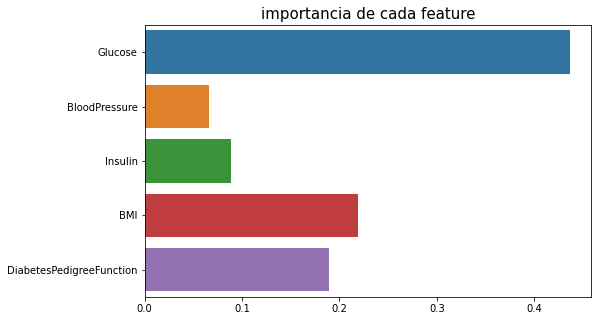

In [ ]:
#ploteamos la importancia de los atributos elegidos a la hora de hacer la prediccion

plt.figure(figsize=(8,5))
importances= clf1.feature_importances_
columns=X.columns
sns.barplot(y=columns,x=importances)
plt.title('importancia de cada feature',fontsize=15)
plt.show()

In [ ]:
#Generamos la métrica accurancy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))

0.7077922077922078


In [ ]:
#generamos otras métricas para evaluar el modelo2
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred1))

0.52


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred1))

0.5531914893617021


**R4/ El modelo que genera mayor accuracy es el modelo 1, por lo tanto, dibujamos el árbol de decisión y generamos para este la matriz de confusión**

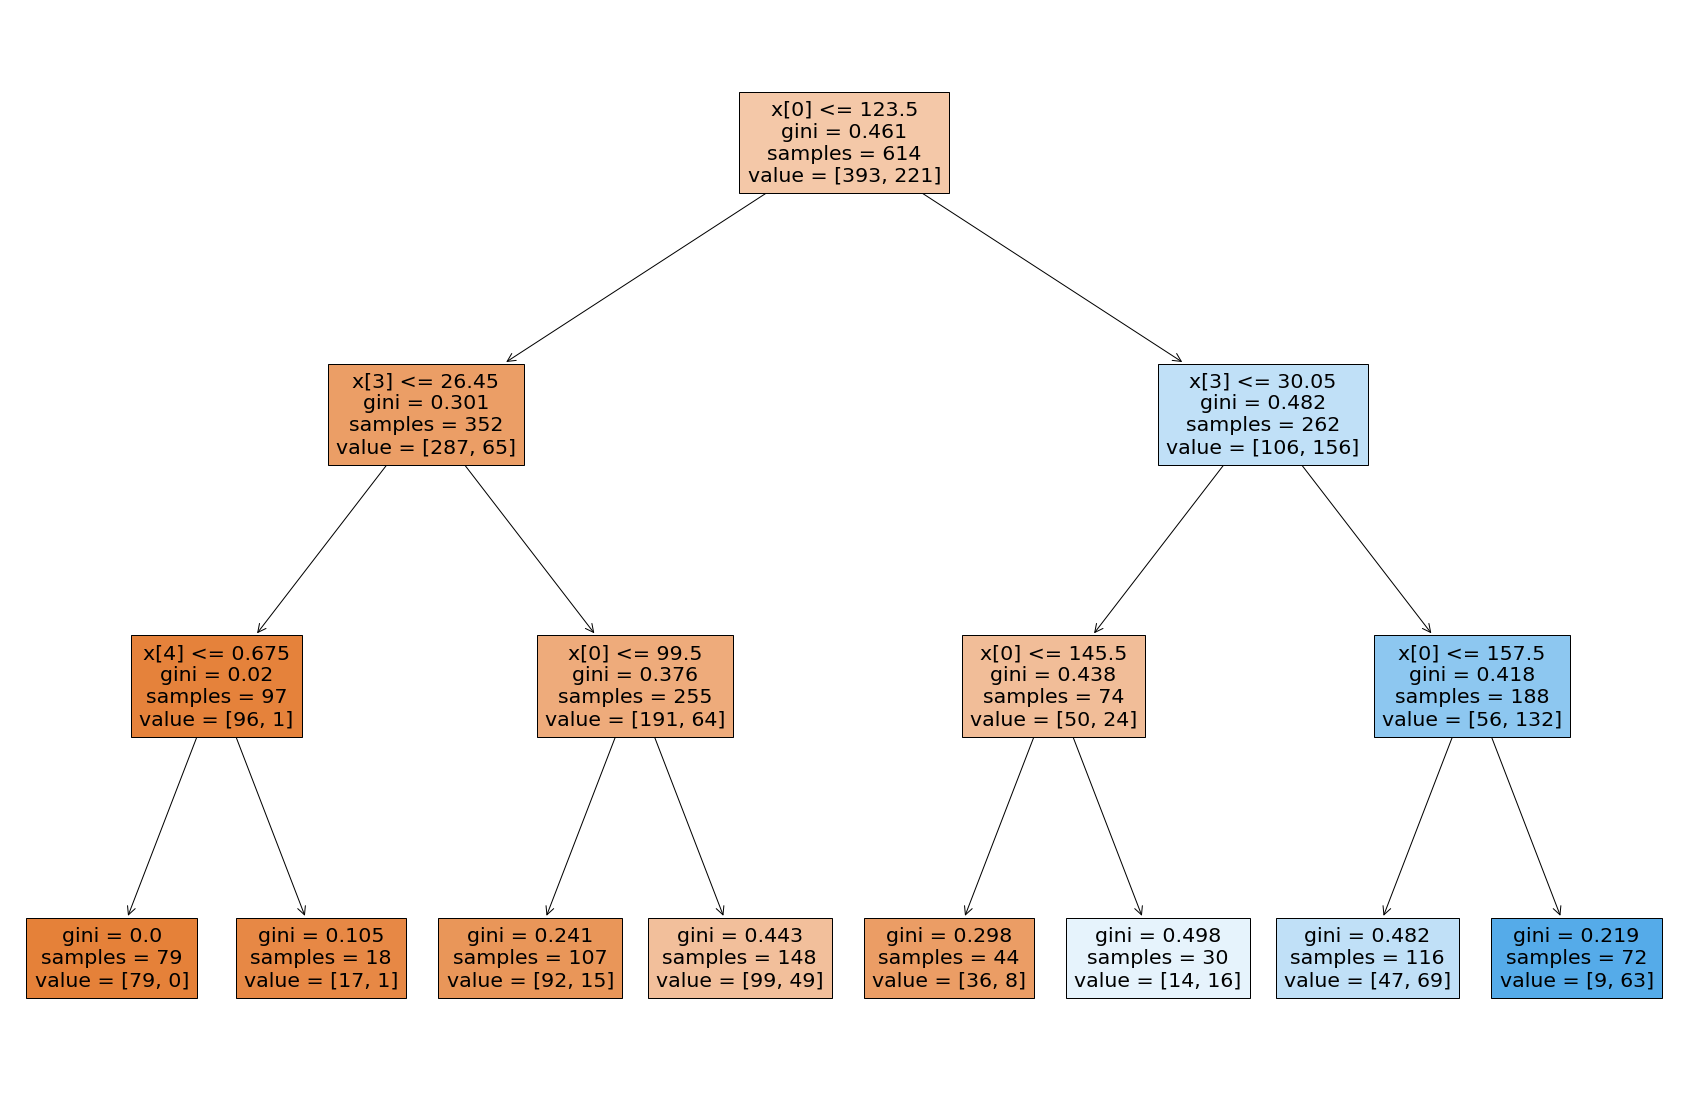

In [ ]:
#visualizando el árbol de decisión 
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(clf, filled=True)
plt.show()

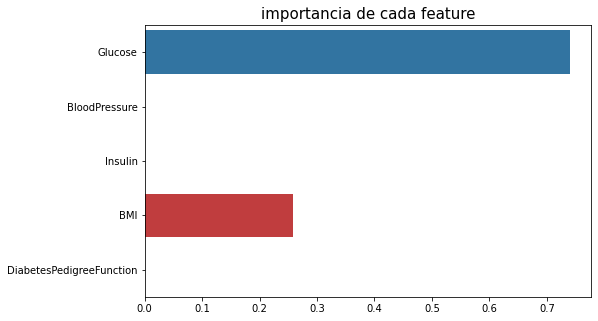

In [ ]:
#ploteamos la importancia de los atributos elegidos a la hora de hacer la prediccion

plt.figure(figsize=(8,5))
importances= clf.feature_importances_
columns=X.columns
sns.barplot(y=columns,x=importances)
plt.title('importancia de cada feature',fontsize=15)
plt.show()

In [ ]:
#importamos métricas del módulo sklearn
from sklearn import metrics

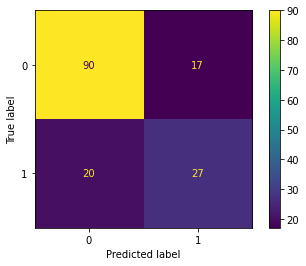

In [ ]:
#Creación de la matriz
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
#generamos otras métricas para evaluar el modelo1
from sklearn.metrics import precision_score
#relación entre las predicciones correctas y el número total de predicciones correctas previstas. 
#Esto mide la precisión del clasificador a la hora de predecir casos positivos.
precision = precision_score(y_test, y_pred)
print(precision)

0.6136363636363636


In [ ]:
from sklearn.metrics import recall_score
#relación entre las predicciones positivas correctas y el número total de predicciones positivas. 
#O más simplemente, cuán sensible es el clasificador para detectar instancias positivas. 
#Esto también se conoce como la tasa verdadera positiva.
sensibilidad = recall_score(y_test,y_pred)
print(sensibilidad)

0.574468085106383


**R5/** De acuerdo a lo observado anteriormente, se puede evidenciar que obtuvo mayor exactitud el modelo 1 con un árbol de decisión con profundidad 3, que el modelo 2 con un árbol de decisión con profudidad 6, obteniendo valores de 75% y 70% respectivamente. De esto podemos deducir que en este caso a menor cantitad de capas en el árbol, arroja predicciones más acertadas para el modelo. Queriendo decir que el modelo 1 clasifica correctamente un porcentaje mayor de las instancias, en este caso la predicción de si una persona será diabética o no. Sin embargo, en cuanto a un ánalisis general del modelo 1, se puede evidenciar que a pesar de tener mejores métricas que el modelo 2, tiene igualmente grandes falencias ya que en cuanto a la tasa de verdedaderos positivos (sensibilidad) se encuentra muy por debajo de lo esperado: 57%, al igual que su precisión para predecir casos positivos: 61%.